<a href="https://colab.research.google.com/github/alexxior/TaPAS/blob/main/src/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# OLNY FOR GColab usage:
!git clone --branch alex_dev https://github.com/alexxior/TaPAS.git
# !git clone --branch kamil_dev https://github.com/alexxior/TaPAS.git
%cd TaPAS/src

print("halo jestem na collabie!")

Cloning into 'TaPAS'...
remote: Enumerating objects: 271, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 271 (delta 33), reused 73 (delta 32), pack-reused 195
Receiving objects: 100% (271/271), 51.25 MiB | 23.51 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/TaPAS/src/TaPAS/src
halo jestem na collabie!


In [22]:
import numpy as np
import matplotlib.pyplot as plt

!pip install openwind
import openwind
print("OK!")

OK!


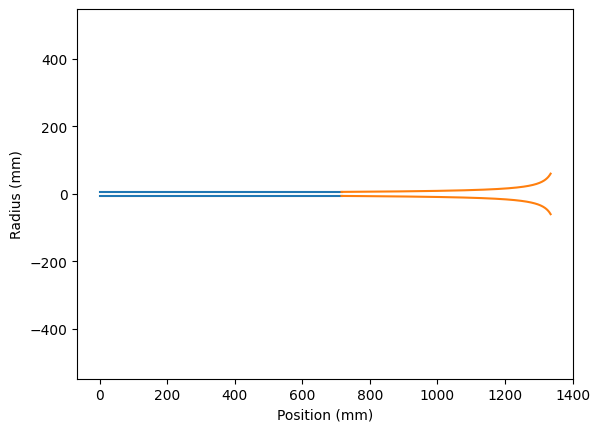

In [5]:
instru_geom = openwind.InstrumentGeometry('simplified-trumpet.csv')
instru_geom.plot_InstrumentGeometry()
plt.show()

/usr/local/lib/python3.10/dist-packages/openwind/impedance_computation.py:237: UserWarning: The default temperature is 25 degrees Celsius.
  warnings.warn('The default temperature is 25 degrees Celsius.')


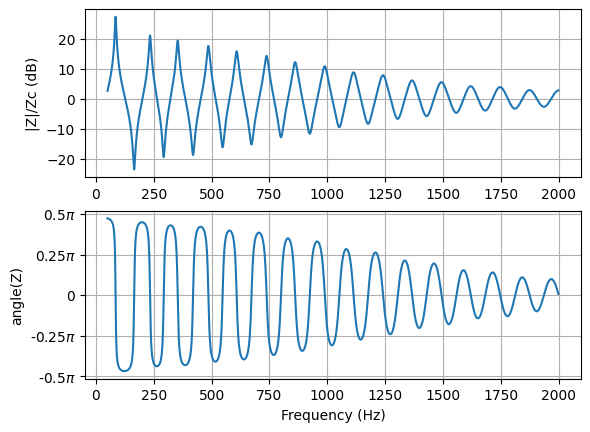

In [6]:
frequencies = np.arange(50,2000,1)
#Then, we can use ImpedanceComputation to compute and plot the impedance of the instrument.

result = openwind.ImpedanceComputation(frequencies, 'simplified-trumpet.csv')
result.plot_impedance()
plt.show()

In [7]:
result = openwind.ImpedanceComputation(frequencies, 'simplified-trumpet.csv', temperature=30)
#The peaks and dips of the resulting curve are slightly shifted toward higher frequencies, because the speed of sound has increased.

#Exporting the impedance to a file
#The impedance can be written to a file using function write_impedance:

result.write_impedance('impedance.txt')

In [13]:
my_player = openwind.Player("TUTORIAL_REED")
#Using this Player, we can launch a very short simulation of 0.5 seconds.

simulation = openwind.simulate(1, 'simplified-trumpet.csv', player=my_player)

Using Theta scheme, theta = 0.25

Starting simulation! (Current time is 22:36:14 (02/05/2024))
n_steps = 89677
6% : 14s remaining
20% : 22s remaining
48% : 11s remaining
100%! Simulation ran for 15s, and stopped at 22:36:29 (02/05/2024).


<openwind.temporal.RecordingDevice (stopped, t=1.000e+00); values.keys()=['source_pressure', 'source_flow', 'source_y', 'bell_radiation_pressure', 'bell_radiation_flow', 'bell_radiation_y']; >


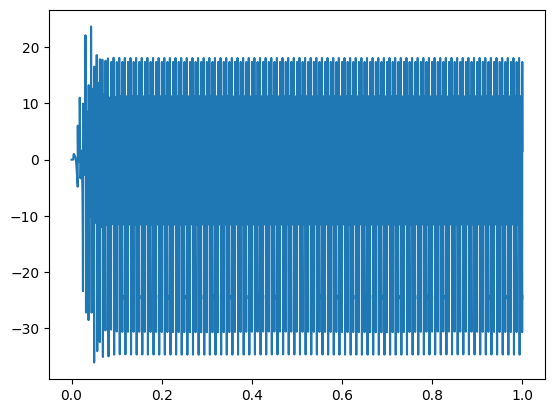

In [14]:
print(simulation)
#Plotting the waveform
#The sound that can be heard from the outside is the radiated pressure, so let us plot the evolution of 'bell_radiation_pressure' as a function of time. Time information is contained in simulation.ts, the array of the times at which data was sampled.

plt.figure()  # opens a new figure
plt.plot(simulation.ts, simulation.values['bell_radiation_pressure'])
plt.show()

In [15]:
from openwind.temporal.utils import export_mono
export_mono('my_trumpet_reed_simulation.wav', simulation.values['bell_radiation_pressure'], simulation.ts)

Wrote audio to my_trumpet_reed_simulation.wav


In [19]:
# for GColab WAVE FILE playback
from IPython.display import Audio, display
display(Audio('my_trumpet_reed_simulation.wav', autoplay=True))

In [17]:
import wave
FRAMES_PER_SECOND = 1/(simulation.ts[2]-simulation.ts[1])

with wave.open("output.wav", mode="wb") as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(1)
    wav_file.setframerate(FRAMES_PER_SECOND)
    wav_file.writeframes(bytes(simulation.values['bell_radiation_pressure']))

In [20]:
# from playsound import playsound
# playsound('output.wav')

In [18]:
# for GColab WAVE FILE playback
from IPython.display import Audio, display
display(Audio('output.wav', autoplay=True))